<a href="https://colab.research.google.com/github/naomori/codexa_DecisionTree_RandomForest/blob/master/Chapter4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section.1: Dataset

https://www.kaggle.com/uciml/breast-cancer-wisconsin-data#data.csv

In [2]:
# ローカルファイルを直接アップロードする
from google.colab import files
uploaded = files.upload()
 

Saving data.csv to data.csv


# Section.3: ライブラリとデータの読み込み



In [0]:
# データ処理の基本的なライブラリ
import pandas as pd 
import numpy as np 

# データ可視化のライブラリ
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns 

# 機械学習ライブラリ
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# 決定木の可視化
from sklearn import tree
import graphviz

#その他設定
pd.set_option('max_columns', 35)
pd.set_option('max_rows', 600)
sns.set_style("darkgrid")

In [4]:
# CSVファイルをデータフレーム形式で読み込み
breastcancer = pd.read_csv('data.csv')

# 最初の5行を表示
breastcancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Section.4: データの確認

In [5]:
# データセットの基本統計量の確認
breastcancer.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [6]:
# ターゲット（diagnosis）のユニーク値を確認
breastcancer.diagnosis.unique()

# ターゲットのカウント
breastcancer['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [7]:
# 欠損データの確認 missing_values_tableを作る
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum()/len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns= {0 : 'Missing Values', 1: '% of total values'})
    return mis_val_table_ren_columns

missing_values_table(breastcancer)

,Missing Values,% of total values
id,0,0.0
diagnosis,0,0.0
radius_mean,0,0.0
texture_mean,0,0.0
perimeter_mean,0,0.0
area_mean,0,0.0
smoothness_mean,0,0.0
compactness_mean,0,0.0
concavity_mean,0,0.0
concave points_mean,0,0.0


# Section.5: データの前処理

In [0]:
# 不要なカラム（何も値が含まれていない空の列）をデータセットから削除する
breastcancer = breastcancer.drop(['id','Unnamed: 32'],axis=1)

In [0]:
# ターゲットの値を文字列から数値へ変換する
labelencoder=LabelEncoder()
breastcancer['diagnosis'] = labelencoder.fit_transform(breastcancer['diagnosis'])

In [13]:
# データセットの最初の5行を確認
breastcancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [0]:
# 訓練データとテストデータへスピリット
train_set, test_set = train_test_split(breastcancer, test_size = 0.2, random_state = 42)

In [0]:
# 特徴量とターゲットを切り分ける
X_train = train_set.drop('diagnosis',axis=1)
y_train = train_set['diagnosis'].copy()

X_test = test_set.drop('diagnosis',axis=1)
y_test = test_set['diagnosis'].copy()

# Section.6: データの可視化

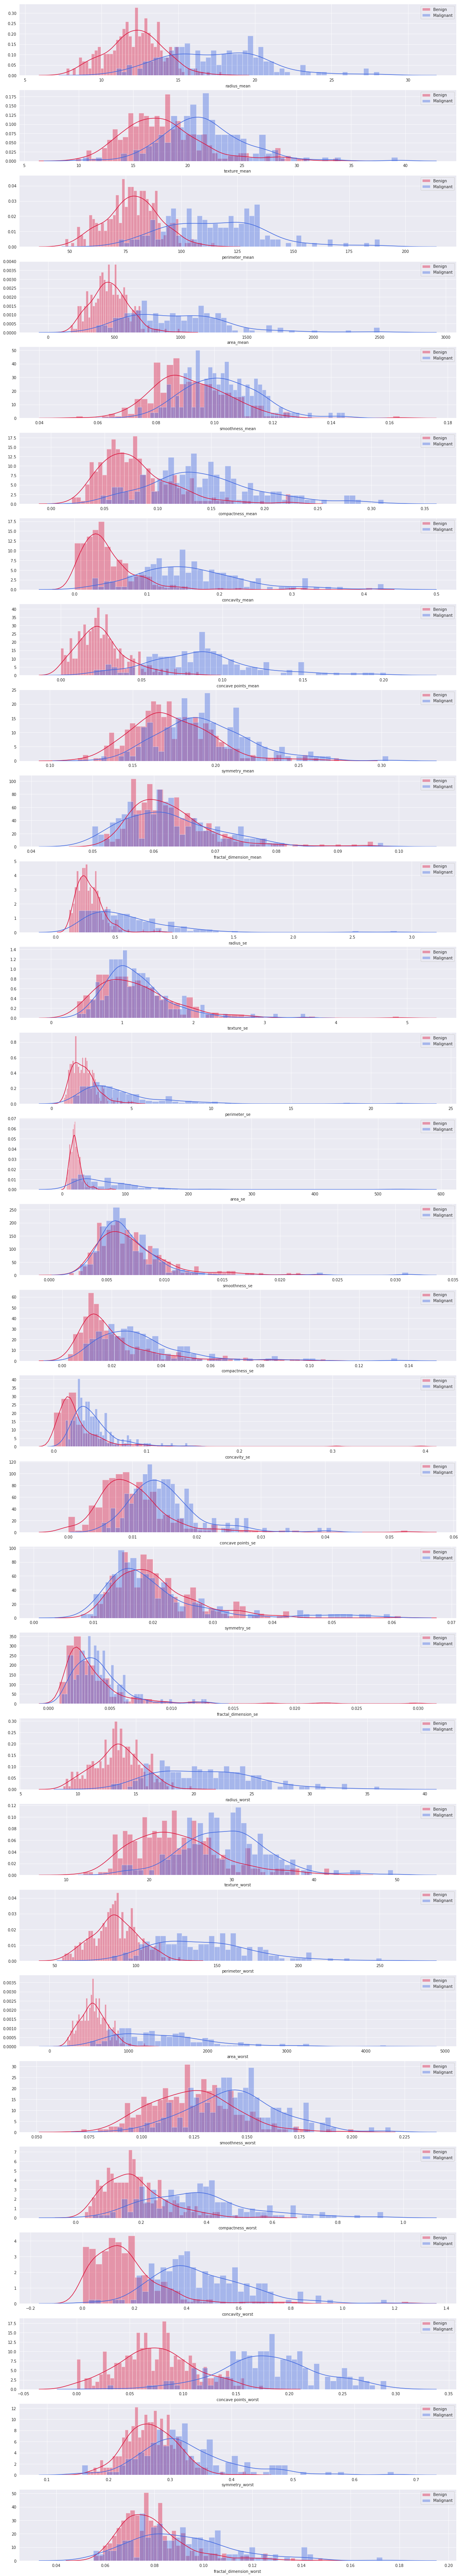

In [16]:
# 特徴量ごとにターゲットの分布を可視化
bc_features = breastcancer.iloc[:,1:33].columns

legend= ['Benign','Malignant']
plt.figure(figsize=(20,32*4))
gs = gridspec.GridSpec(32, 1)
for i, col in enumerate(train_set[bc_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(train_set[col][train_set.diagnosis == 0],bins=50, color='crimson')
    sns.distplot(train_set[col][train_set.diagnosis == 1],bins=50, color='royalblue')
    plt.legend(legend)

# Section.7: 特徴選択

In [17]:
# 特徴選択
RF = RandomForestClassifier(n_estimators = 250, random_state = 42)
RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [18]:
# 重要度が高い順にソートして表示
features = X_train.columns
importances = RF.feature_importances_

print("重要度が高い特徴量順:")
print(sorted(zip(map(lambda x: round(x, 2), RF.feature_importances_), features), 
             reverse=True))

重要度が高い特徴量順:
[(0.13, 'perimeter_worst'), (0.13, 'concave points_worst'), (0.13, 'area_worst'), (0.11, 'concave points_mean'), (0.07, 'radius_worst'), (0.05, 'radius_mean'), (0.05, 'concavity_mean'), (0.04, 'perimeter_mean'), (0.04, 'concavity_worst'), (0.04, 'area_mean'), (0.02, 'texture_worst'), (0.02, 'radius_se'), (0.02, 'compactness_worst'), (0.02, 'compactness_mean'), (0.02, 'area_se'), (0.01, 'texture_mean'), (0.01, 'symmetry_worst'), (0.01, 'smoothness_worst'), (0.01, 'smoothness_mean'), (0.01, 'perimeter_se'), (0.01, 'fractal_dimension_worst'), (0.01, 'fractal_dimension_se'), (0.01, 'concavity_se'), (0.0, 'texture_se'), (0.0, 'symmetry_se'), (0.0, 'symmetry_mean'), (0.0, 'smoothness_se'), (0.0, 'fractal_dimension_mean'), (0.0, 'concave points_se'), (0.0, 'compactness_se')]


In [0]:
# 訓練・テストデータ共に重要度の高い特徴量のみへ更新
X_train = X_train[['perimeter_worst','concave points_worst','area_worst','concave points_mean','radius_worst']]
X_test = X_test[['perimeter_worst','concave points_worst','area_worst','concave points_mean','radius_worst']]

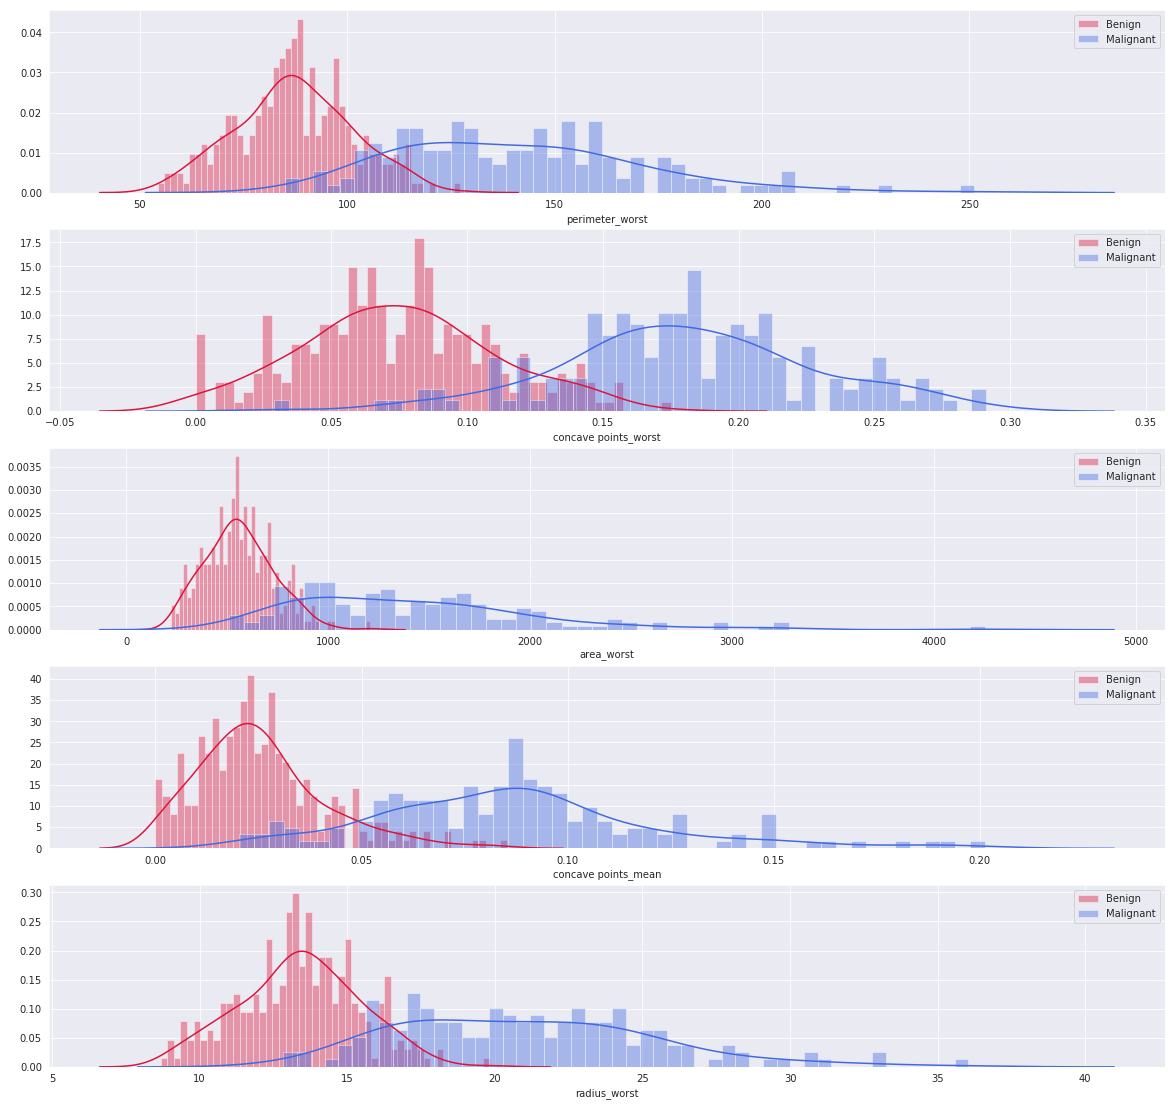

In [20]:
# 特徴量とターゲットの可視化
bc_features = X_train.columns
legend= ['Benign','Malignant']
plt.figure(figsize=(20,32*4))
gs = gridspec.GridSpec(32, 1)
for i, col in enumerate(train_set[bc_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(train_set[col][train_set.diagnosis == 0],bins=50, color='crimson')
    sns.distplot(train_set[col][train_set.diagnosis == 1],bins=50, color='royalblue')
    plt.legend(legend)


# Section.8: 決定木のモデル訓練

In [0]:
# 決定木のモデル訓練
clf = DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train, y_train)

In [0]:
# 訓練データの特徴量を使って予測
y_pred = clf.predict(X_train)

In [23]:
# 訓練データを使った予測の混同行列表示
cnf_matrix = confusion_matrix(y_train,y_pred)
cnf_matrix

array([[280,   6],
       [  9, 160]])

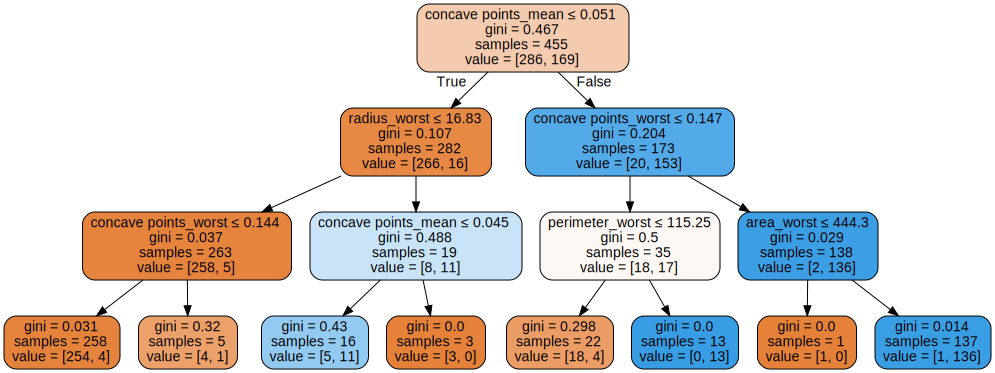

In [25]:
# 決定木の視覚化
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names = X_train.columns,
                                filled=True,rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data) 
graph

In [0]:
# テストデータを訓練ずみモデルで予測
y_pred_test = clf.predict(X_test)

In [27]:
# テストデータでの混同行列
cnf_matrix = confusion_matrix(y_test,y_pred_test)
cnf_matrix

array([[69,  2],
       [ 5, 38]])

In [28]:
# テストデータでの正解率
accuracy_score(y_test,y_pred_test)

0.9385964912280702

# Section.9: ランダムフォレストのモデル訓練

In [0]:
# ランダムフォレストのモデル訓練
RF = RandomForestClassifier(n_estimators = 250)
RF = RF.fit(X_train,y_train)

In [0]:
# テストデータで予測
RF_y_pred_test = RF.predict(X_test)

In [31]:
# テストデータの予測結果（混同行列）
cnf_matrix = confusion_matrix(y_test,RF_y_pred_test)
cnf_matrix

array([[69,  2],
       [ 3, 40]])

In [32]:
# ランダムフォレスト テストデータ 正解率
accuracy_score(y_test,RF_y_pred_test)

0.956140350877193